Library

In [92]:
import math
import random
import copy

variabel (x1,x2)

In [93]:
#parameter yang digunakan

ukuranpopulasi = 75
chromelen = 3
generation = 100
ratecrossover = 0.6
ratemutation = 0.3

Fungsi generate kromosom

In [94]:
def createChromosome(chrom_len):
    chrom = []
    for i in range(chrom_len):
        chrom.append(random.randint(0,9))
    return chrom

Membuat populasi

In [95]:
def createPopu(poplen):
    pop = []
    for i in range(poplen):
        pop.append(createChromosome(6))
    return pop

menghitung batas atas dan bawah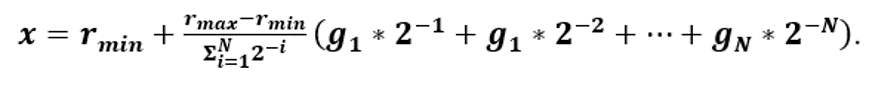

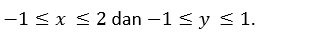

In [96]:
def countchromo(nilai):
    x1 = -1 + ((2-(-1))/(9*(10**-1 + 10**-2 + 10**-3))) * ((nilai[0]*10**-1) + (nilai[1]*10**-2) + (nilai[2]*10**-3))
    x2 = -1 + ((1-(-1))/(9*(10**-1 + 10**-2 + 10**-3))) * ((nilai[0]*10**-1) + (nilai[1]*10**-2) + (nilai[2]*10**-3))

    return [x1, x2]

nilai fungsi pada soal

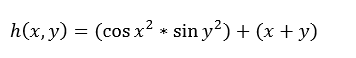

In [97]:
def mainfungsi(x1,x2):
  f = (math.cos(x1) * math.sin(x2)) + (x1 + x2)
  return f

nilai fitness

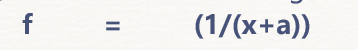

In [98]:
def countFitness(f):
    x1,x2 = countchromo(f)
    fit = 1/(mainfungsi(x1,x2))+0.01
    return fit

nilai fitness

In [99]:
def countAllFitness(pop, ukpop):
    fitAll = [countFitness(pop[x]) for x in range(ukpop)]
    return fitAll

elitisme

In [100]:
def elitisme(fitAll):
    allfit = fitAll.index(max(fitAll))
    return allfit

parent

In [101]:
def tournamentSelection(pop, chromelen, pop_count):
    parent = []
    for i in range(1, chromelen):
        total = pop[random.randint(0, pop_count-1)]
        if (parent == []) or (countFitness(total) > countFitness(parent)):
            parent = total
    return parent
    

crossover

In [102]:
def crossover(parent1, parent2, ratecrossover):
  if random.uniform(0,1) <= ratecrossover: 
    flag = random.choice(range(1, len(parent1)-1))
    temp = parent1[flag:]
    parent1[flag:] = parent2[flag:]
    parent2[flag:] = temp

  return parent1, parent2

mutasi

In [103]:
def mutation(child1, child2, ratemutation):
  for i in range(chromelen):
    if random.uniform(0,1) <= ratemutation:
      if child1[i] >= 5:
        child1[i] = child1[i] - 0
      elif child1[i] < 5:
        child1[i] = child1[i] + 1
    if random.uniform(0,1) <= ratemutation:
      if child2[i] >= 5:
        child2[i] = child2[i] - 0
      elif child2[i] < 5:
        child2[i] = child2[i] + 1
 
  return child1, child2

main

In [104]:
population = createPopu(ukuranpopulasi)
for i in range(generation):
    fitness = countAllFitness(population, ukuranpopulasi)
    populasibaru = []
    total = elitisme(fitness)
    populasibaru.append(population[total])

    cari = 0
    while (cari < ukuranpopulasi):

        #parent melakukan perkawinan
        parent1 = tournamentSelection(population, chromelen, ukuranpopulasi)
        parent2 = tournamentSelection(population, chromelen, ukuranpopulasi)
        while parent1 == parent2:
            parent1 = tournamentSelection(population, chromelen, ukuranpopulasi)
        
        #dilakukannya perkawinan silang yang akan mendapatkan anak/child
        child1, child2 = parent1.copy(), parent2.copy()
        child = crossover(child1, child2, ratecrossover)

        #membuat generasi baru menghasilkan child
        child1, child2 = mutation(child1, child2, ratemutation)
 
        #generasi baru
        populasibaru.extend([child1, child2])
        cari += 2
    population = populasibaru

fitness = countAllFitness(population, ukuranpopulasi)
hasil = elitisme(fitness)

print('')
print('Generasi ke :', i+1)
print('Chromosome Terbaik:', population[hasil])
print('Nilai Fitness :', countFitness(population[hasil]))
print('Nilai Phenotype (x1, x2) : ', countchromo(population[hasil]))
print('')


Generasi ke : 100
Chromosome Terbaik: [4, 3, 4, 4, 9, 0]
Nilai Fitness : 21.113788745834288
Nilai Phenotype (x1, x2) :  [0.30330330330330346, -0.13113113113113095]

